<a href="https://colab.research.google.com/github/lampyyyy18/Credit-Card-Fraud-2/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import relevant libraries
import os
import gc
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
file_path = '/content/gdrive/MyDrive/kaggle/credit-card-data/creditcard_csv.csv'
df = pd.read_csv(file_path)

### 1. Data Exploration
We get a feel of the distribution of the data. We want to know the prescence of duplicates, adverse data types and missing data.

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [ ]:
# turn Class data into integer as part of cleaning
df.Class = df.Class.apply(
    lambda x: 1 if x == "'1'" else 0
)

In [ ]:
# check for missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# note there are some duplicate datapoints in the dataset
df.duplicated().sum()

np.int64(1081)

In [ ]:
df.Class.value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# we need to balance the data ourselves
fraud = df[df.Class == 1]
real = df[df.Class == 0]

In [ ]:
# get a feel of the distribution of fraud and real data
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
real.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


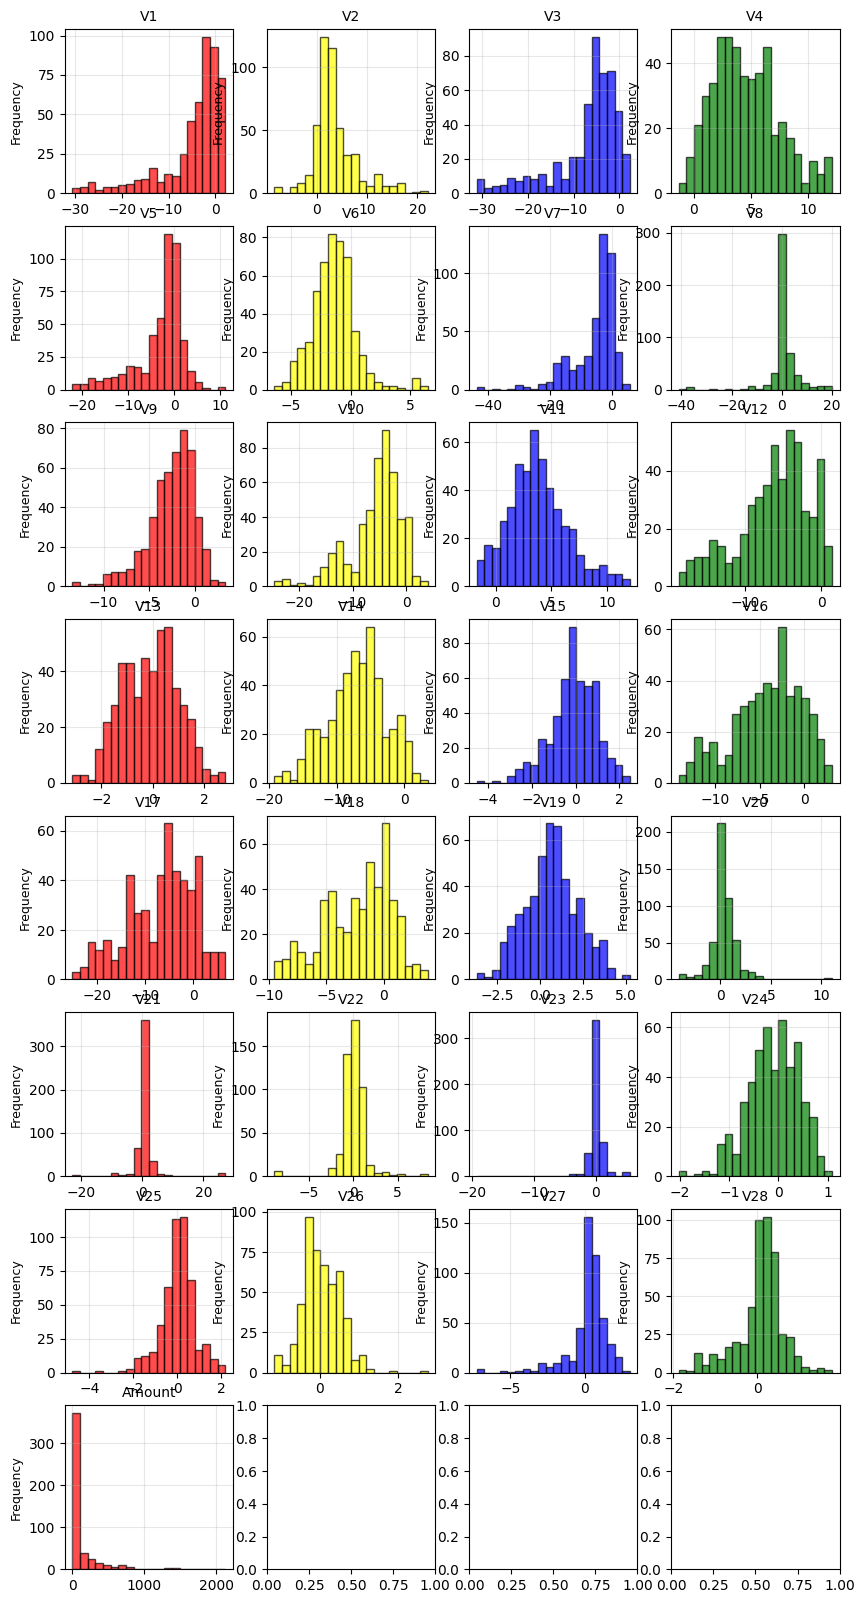

In [ ]:
# make sense of distribution of data for fraud data
cols = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
fig, ax = plt.subplots(nrows = 8,ncols = 4,figsize = (10,20))
colors = ["red", "yellow", "blue", "green"]

count = 0
for i in range(8):
    for j in range(4):
        if count == len(cols):
          break
        ax[i, j].hist(fraud[f"{cols[count]}"], bins=20,
                        color=colors[j], edgecolor='black', alpha=0.7)
        ax[i, j].set_title(f"{cols[count].title()}", fontsize=10)
        ax[i, j].set_ylabel("Frequency", fontsize=9)
        ax[i, j].grid(alpha=0.3)
        count += 1

In [ ]:
# quantify the level of skewness
fraud_skew_data = []
for i in range(len(cols)):
    quant_skew = fraud[cols[i]].skew()
    print(f"Skewness of {[i]}: {quant_skew}")
    fraud_skew_data.append(quant_skew)

Skewness of [0]: -1.7976165818644254
Skewness of [1]: 1.226560664618368
Skewness of [2]: -1.5149849043649835
Skewness of [3]: 0.49674552174083764
Skewness of [4]: -1.3611392377538267
Skewness of [5]: 0.8677337433422485
Skewness of [6]: -1.8275994413500927
Skewness of [7]: -2.830021579507798
Skewness of [8]: -0.9750748993053345
Skewness of [9]: -1.152719255273442
Skewness of [10]: 0.4990895390524295
Skewness of [11]: -0.6668295433512433
Skewness of [12]: -0.025995714144381264
Skewness of [13]: -0.2515536517772249
Skewness of [14]: -0.5350663990228822
Skewness of [15]: -0.49526267447450384
Skewness of [16]: -0.48609530826875563
Skewness of [17]: -0.5106844928429956
Skewness of [18]: 0.0452484851786625
Skewness of [19]: 2.162193192926424
Skewness of [20]: 2.652616056410383
Skewness of [21]: -1.500122704466998
Skewness of [22]: -5.3901888665353015
Skewness of [23]: -0.45089358389054873
Skewness of [24]: -0.7828106827521244
Skewness of [25]: 0.5285354956945839
Skewness of [26]: -2.260601770

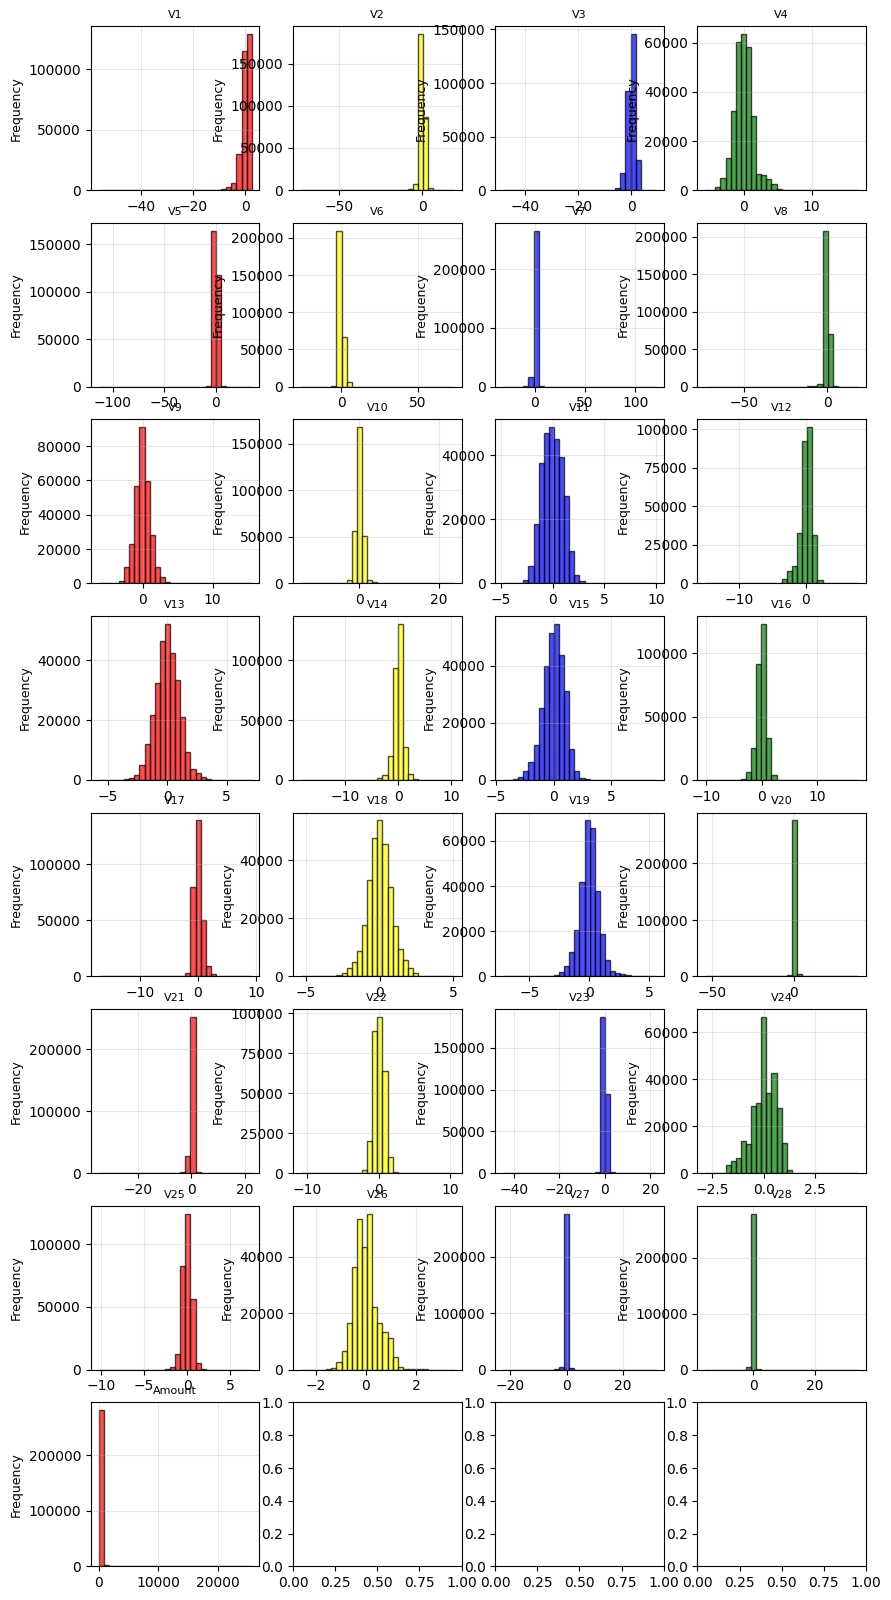

In [ ]:
# get idea of skewness of non-fraudulent data
fig, ax = plt.subplots(nrows = 8,ncols = 4,figsize = (10,20))
colors = ["red", "yellow", "blue", "green"]

count = 0
for i in range(8):
    for j in range(4):
        if count == len(cols):
          break
        ax[i, j].hist(real[f"{cols[count]}"], bins=30,
                        color=colors[j], edgecolor='black', alpha=0.7)
        ax[i, j].set_title(f"{cols[count].title()}", fontsize=8)
        ax[i, j].set_ylabel("Frequency", fontsize=9)
        ax[i, j].grid(alpha=0.3)
        count += 1

In [ ]:
real_skew_data = []
for i in range(len(cols)):
    quant_skew = real[cols[i]].skew()
    print(f"Skewness of {[i]}: {quant_skew}")
    real_skew_data.append(quant_skew)

Skewness of [0]: -3.130188262057059
Skewness of [1]: -4.887165729110885
Skewness of [2]: -1.4536763449481322
Skewness of [3]: 0.581137473573922
Skewness of [4]: -2.2139034848904684
Skewness of [5]: 1.842603521029746
Skewness of [6]: 4.747800451196889
Skewness of [7]: -8.395491860350225
Skewness of [8]: 0.6656351733841908
Skewness of [9]: 2.422277857402221
Skewness of [10]: 0.14553656726112665
Skewness of [11]: -1.2563010407839383
Skewness of [12]: 0.0655816748450145
Skewness of [13]: -0.7038570879643036
Skewness of [14]: -0.3076588985192295
Skewness of [15]: -0.4395230335827775
Skewness of [16]: 0.22452781823559353
Skewness of [17]: -0.039861682653809086
Skewness of [18]: 0.09748424715780188
Skewness of [19]: -2.0781132986125788
Skewness of [20]: 3.0091133189998174
Skewness of [21]: -0.19303040206719815
Skewness of [22]: -5.8145957883885515
Skewness of [23]: -0.5528637967520437
Skewness of [24]: -0.4136873076527005
Skewness of [25]: 0.5768124328593139
Skewness of [26]: -1.0712480372144

In both the fraud and non-fraud data, we can observe some significant levels of skewness. As part of data preprocessing, we will test some scaling methods to account for this. This is to improve performance when testing linear, logistic, KNN and support vector machines (SVMs).

We also need to manually balance out the data given the data is extremely unbalanced.

First, we resample some fraud data - combining methods reduces the degree of overfitting.

In [ ]:
# we take a smaller sample of the non fraud data and increase the number of samples of fraud data
from sklearn.utils import resample
real_sample = real.sample(984)
fraud_sample = fraud.sample(492)
cardData = pd.concat([real_sample, fraud_sample, fraud], axis=0)

In [ ]:
# now we break them into independent and dependent variables
y = cardData.Class
X = cardData.copy()
X = X.drop(columns=['Class', 'Time'])
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
# split the data into training and test data split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

Here, we'll begin testing different models without any tuning as baseline using a pipeline.

In [ ]:
# started using standard scalar and base machine learning models to determine performance
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
# define a function to determine the performance of a model
def fit_and_perform(p, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid):
  p.fit(X_train, y_train)
  train_result = cross_val_score(p, X_train, y_train, cv=5)
  y_pred = p.predict(X_valid)
  accuracy = accuracy_score(y_pred, y_valid)

  print(train_result)
  print("Average train accuracy: " + str(train_result.sum() / 5))
  print("Test accuracy: " + str(accuracy))


In [ ]:
# testing all machine learning models except the neural network
ml_models = [('GaussianNB', GaussianNB()), ('Logistic regression', LogisticRegression(random_state=42)), ('KNN regression', KNeighborsClassifier()),
  ('XGB Classifier', XGBClassifier(random_state=42)), ('Random Forest', RandomForestClassifier())]

for model in ml_models:
  p1 = Pipeline([('Scaler', StandardScaler()),
  model])
  print(f"Model: {model[0]}\n")
  fit_and_perform(p1)
  print("\n")



Model: GaussianNB

[0.92380952 0.9015873  0.91428571 0.93650794 0.90127389]
Average train accuracy: 0.9154928723081589
Test accuracy: 0.9314720812182741


Model: Logistic regression

[0.93333333 0.93015873 0.93015873 0.95873016 0.93312102]
Average train accuracy: 0.9371003942978465
Test accuracy: 0.9517766497461929


Model: KNN regression

[0.92380952 0.91111111 0.93015873 0.92698413 0.93949045]
Average train accuracy: 0.926310787584673
Test accuracy: 0.9467005076142132


Model: XGB Classifier

[0.96825397 0.95555556 0.96507937 0.98412698 0.97133758]
Average train accuracy: 0.9688706905267415
Test accuracy: 0.9796954314720813


Model: Random Forest

[0.97460317 0.96190476 0.96507937 0.98095238 0.97133758]
Average train accuracy: 0.9707754524315033
Test accuracy: 0.9847715736040609




In [ ]:
# try seeing whether MinMaxScaler will produce better results
for model in ml_models:
  p2 = Pipeline([('Scaler', MinMaxScaler()),
  model])
  print(f"Model: {model[0]}\n")
  fit_and_perform(p1)
  print("\n")


Model: GaussianNB

[0.92380952 0.9015873  0.91428571 0.93650794 0.90127389]
Average train accuracy: 0.9154928723081589
Test accuracy: 0.9314720812182741


Model: Logistic regression

[0.94285714 0.92380952 0.92063492 0.94603175 0.93312102]
Average train accuracy: 0.9332908704883227
Test accuracy: 0.9517766497461929


Model: KNN regression

[0.95555556 0.92380952 0.93333333 0.94603175 0.93312102]
Average train accuracy: 0.9383702355676877
Test accuracy: 0.9543147208121827


Model: XGB Classifier

[0.96825397 0.95555556 0.96507937 0.98412698 0.97133758]
Average train accuracy: 0.9688706905267415
Test accuracy: 0.9796954314720813


Model: Random Forest

[0.97460317 0.96507937 0.96825397 0.97777778 0.96815287]
Average train accuracy: 0.9707734303912648
Test accuracy: 0.9822335025380711




The results of the base training are as follows (in order of performance on the test data).
1. Random Forest (StandardScaler) - 98.48%
2. XGBoost (StandardScaler) - 97.97%
3. KNeighbours Classifier (MinMaxScaler) - 95.43%
4. Logistic Regression (StandardScaler) - 95.18%
5. GaussianNB - 93.14%


The difference in scaler only made a different for the KNN classifier though it is clear that XGBoost performs the best. MinMaxScaler made RandomForest perform slightly worse than with StandardScaler.

Now, we'll test the performance of each model (including a neural network), fine tuning to get the best possible performance.

In [ ]:
# first we'll try find the best parameters for random forest
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid =  {'n_estimators': [100, 200],
                'bootstrap': [True,False],
                'max_depth': [10,50, None],
                'max_features': ['sqrt'],
                'min_samples_leaf': [1, 4],
                'min_samples_split': [2, 10]}

# find the best parameters for Random Forest for min-max and standard scaler
tuned_rf = GridSearchCV(rf, param_grid, cv=5, verbose=True, scoring='accuracy')

# make a general function to find the best parameters for each specific model
def fit_and_perform_best(model, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid):
  for scaler in [StandardScaler(), MinMaxScaler()]:
    p = Pipeline([('Scaler', scaler)])
    print(f"Scaler: {scaler}\n")
    p.fit(X_train,y_train)
    model.fit(p.transform(X_train), y_train)

    # check best performance on training data
    print("Best params: ", model.best_params_)
    print("Best score: ", model.best_score_)

    # then check on the test data
    best_rf = model.best_estimator_
    X_valid_transform = p.transform(X_valid)
    test_accuracy = best_rf.score(X_valid_transform, y_valid)
    print(test_accuracy)
    print("\n")

fit_and_perform_best(tuned_rf)

Scaler: StandardScaler()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.9771287028611869
0.9822335025380711


Scaler: MinMaxScaler()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params:  {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.9758568395511071
0.9847715736040609




In [ ]:
# try for KNNeighbours
knn_param_grid = {'n_neighbors': [2, 3, 5, 10, 20, 50],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'p':[1, 2]}

knn = KNeighborsClassifier()
tuned_knn = GridSearchCV(knn, knn_param_grid, cv=5, verbose=True, scoring='accuracy')
fit_and_perform_best(tuned_knn)

Scaler: StandardScaler()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best params:  {'algorithm': 'auto', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
Best score:  0.9752259629966635
0.9873096446700508


Scaler: MinMaxScaler()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best params:  {'algorithm': 'auto', 'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
Best score:  0.9758608836315844
0.9898477157360406




In [ ]:
# finding the best parameters for XGBoost
xgb_param_grid = {
    'max_depth': [5, 10, 15, None],
    'n_estimators': [100, 500, 1000, 1500],
    'learning_rate': [0.01, 0.1, 1],
    'subsample':[0.7, 0.8, 0.9],}

xgb = XGBClassifier(n_jobs=-1)
tuned_xgb = GridSearchCV(xgb, xgb_param_grid, cv=5, verbose=True, scoring='accuracy')
fit_and_perform_best(tuned_xgb)

Scaler: StandardScaler()

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best params:  {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.9}
Best score:  0.9745829542007887
0.9695431472081218


Scaler: MinMaxScaler()

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best params:  {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.9}
Best score:  0.9745829542007887
0.9695431472081218




In [ ]:
# finding the best parameters for logistic regression
lg_param_grid =  {'max_iter' : [1000, 2000, 3000, 4000],
    'l1_ratio' : [0, 0.25, 0.5, 0.75, 1],
    'C' : [0.001, 0.01, 0.1, 1, 10],
    'solver' : ['liblinear']}

lg = LogisticRegression()
tuned_lg = GridSearchCV(lg, lg_param_grid, cv=5, verbose=True, scoring='accuracy')
fit_and_perform_best(tuned_lg)

Scaler: StandardScaler()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_

Best params:  {'C': 10, 'l1_ratio': 0, 'max_iter': 1000, 'solver': 'liblinear'}
Best score:  0.9371003942978465
0.9517766497461929


Scaler: MinMaxScaler()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_

Best params:  {'C': 10, 'l1_ratio': 0, 'max_iter': 1000, 'solver': 'liblinear'}
Best score:  0.9345586897179254
0.9365482233502538




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_

Final results from tuning the models:

1. KNNeighboursClassifier - 98.98%
2. RandomForestClassifer - 98.48%
3. XGBoost - 96.54%
4. LogisticRegression - 93.65%

KNNeighbourClassifer becomes the best performing model from tuning. KNNeighbourClass

Neural networks typically aren't as great for tabular data but we test out the performance on the dataset using PyTorch. To do that, we're going to have to go back a couple sets and convert our data into tensors for PyTorch to use.

In [ ]:
# import relevant librarires
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
# split our training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# tested without scaling, StandardScaler and MinMaxScaler - StandardScaler allows for the best performance
# convert to numpy arrays then tensors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)

In [ ]:
# float tensor
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_valid_tensor = torch.FloatTensor(X_valid_scaled)

y_train_tensor= torch.LongTensor(y_train.values)
y_valid_tensor = torch.LongTensor(y_valid.values)

In [ ]:
cardData.shape

(1968, 31)

In [ ]:
# build a class for the neural network
class Model(nn.Module):
  # input features - the 29 features from the original column
  def __init__(self, in_features=29, h1=120, h2=60, h3=30, h4=15, h5=30, h6=60, h7=120, out_features=2):
    super().__init__()  # instantiate nn modiule
    self.fc1 = nn.Linear(in_features, h1, bias=False)
    self.bn1 = nn.BatchNorm1d(h1)

    self.fc2 = nn.Linear(h1, h2)
    self.bn2 = nn.BatchNorm1d(h2)

    self.fc3 = nn.Linear(h2, h3)
    self.bn3 = nn.BatchNorm1d(h3)

    self.fc4 = nn.Linear(h3, h4)
    self.bn4 = nn.BatchNorm1d(h4)

    self.fc5 = nn.Linear(h4, h5)
    self.bn5 = nn.BatchNorm1d(h5)

    self.fc6 = nn.Linear(h5, h6)
    self.bn6 = nn.BatchNorm1d(h6)

    self.fc7 = nn.Linear(h6, h7)
    self.bn7 = nn.BatchNorm1d(h7)

    self.out = nn.Linear(h7, out_features)

  # function that moves inputs forward
  def forward(self, x):
    x = F.relu(self.bn1(self.fc1(x)))
    x = F.relu(self.bn2(self.fc2(x)))
    x = F.relu(self.bn3(self.fc3(x)))
    x = F.relu(self.bn4(self.fc4(x)))
    x = F.relu(self.bn5(self.fc5(x)))
    x = F.relu(self.bn6(self.fc6(x)))
    x = F.relu(self.bn7(self.fc7(x)))

    return self.out(x)


In [ ]:
# generate a manual seed for randomization
torch.manual_seed(42)

# and instantiate the model
model = Model()

In [ ]:
# set criterion to measure the loss function
# Tried both CrossEntropy loss and BCELogitsLoss, ended up with CrossEntropy() in this instance
criterion = nn.CrossEntropyLoss()

# choose an optimiser and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)


In [ ]:
# onto training the model and readjusting where necessary
import matplotlib.pyplot as plt
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train_tensor)

  # measure the loss
  loss = criterion(y_pred, y_train_tensor)
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f"Epoch: {i} and loss: {loss}")

  # complete backpropagration (using SGD)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.728634774684906
Epoch: 10 and loss: 0.22212928533554077
Epoch: 20 and loss: 0.10429009795188904
Epoch: 30 and loss: 0.05414558947086334
Epoch: 40 and loss: 0.021629733964800835
Epoch: 50 and loss: 0.009796986356377602
Epoch: 60 and loss: 0.0053420825861394405
Epoch: 70 and loss: 0.003540741978213191
Epoch: 80 and loss: 0.002635277109220624
Epoch: 90 and loss: 0.0021055983379483223


Text(0.5, 0, 'epoch')

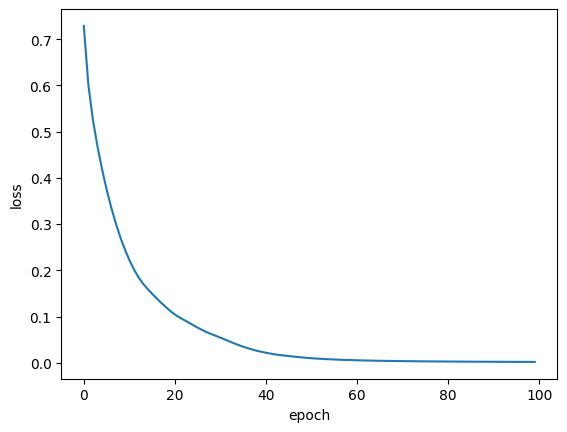

In [ ]:
# having a look of the loss
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
# we can evaluate on the validation set, turning off backpropagation
with torch.no_grad():
  y_eval = model.forward(X_valid_tensor)
  loss = criterion(y_eval, y_valid_tensor)

In [ ]:
loss

tensor(0.0555)

In [ ]:
# checking how well the model did on the test data
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_valid):
    y_val = model.forward(data)

    # checking how correct this model is
    print(f"{i+1} {str(y_val)} \t {y_valid[i]}")

    if y_val.argmax().item() == y_valid[i]:
      correct += 1

print(f"Correct fraud detection: {correct}//{len(y_valid)}")


1 tensor([ 3.2597, -2.3037]) 	 0
2 tensor([-5.8203,  5.4665]) 	 1
3 tensor([0.8360, 0.1629]) 	 0
4 tensor([-13.9838,  13.2689]) 	 1
5 tensor([ 2.6004, -1.9372]) 	 0
6 tensor([-3.4307,  3.7308]) 	 1
7 tensor([ 1.0233, -0.6671]) 	 0
8 tensor([ 1.7696, -1.2759]) 	 0
9 tensor([-23.3899,  22.2637]) 	 1
10 tensor([ 1.4927, -0.9970]) 	 0
11 tensor([ 2.7685, -1.9791]) 	 0
12 tensor([-5.4362,  5.0960]) 	 1
13 tensor([ 2.1793, -1.5672]) 	 0
14 tensor([-7.9661,  7.3882]) 	 1
15 tensor([ 2.7284, -1.9544]) 	 0
16 tensor([-7.1678,  6.7812]) 	 1
17 tensor([ 0.5479, -0.2657]) 	 0
18 tensor([-25.9555,  24.6543]) 	 1
19 tensor([-11.5525,  10.9905]) 	 1
20 tensor([ 0.4625, -0.1285]) 	 0
21 tensor([-24.3774,  23.1374]) 	 1
22 tensor([-11.1793,  10.4866]) 	 1
23 tensor([-3.8949,  3.6085]) 	 1
24 tensor([ 2.8600, -2.1022]) 	 0
25 tensor([ 2.0907, -1.4867]) 	 0
26 tensor([ 1.8467, -0.8298]) 	 1
27 tensor([-7.4440,  7.0745]) 	 1
28 tensor([ 1.7923, -1.3411]) 	 0
29 tensor([-13.5440,  12.9733]) 	 1
30 tensor([

The best results from using various scaling methods on the validation set are as follows.
- No scaling - 88.06% Validation, 93.48 Training
-  StandardScaler - 94.45% Validation, 99.98% Training
- MinMaxScaler - 92.63% Validation, 98.61% Training

I started with 2 hidden layers and 30 neurons and worked upwards from there, slowly adding in batch normalization layers, more layers and neurons. If I were to do the problem again, I would not go beyond 7 layers (it's overkill) - I would max out at 5 layers. StandardScaler() eventually reached 7 layers adopting a bottleneck architecture. As shown above, I've had a preference of adopting a bottleneck architecture for the neural networm that worked particularly well for MinMaxScaler and StandardScaler.

The code above is the best performance I could get using StandardScaler and parameters I found that worked best.

If I were to try something similar again, I would automate the process of trainig the model and checking it's performance with a bit more code.
